In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
labels=['Normal_Classifier','Better_Classifier_Without_Randomness','Better_Classifier']
og=pd.read_csv('Test_Results/Original_Images/01_Original.csv')
attacks=listdir('Test_Results/100_Adv_Imgs/')
attacks.sort()
def Results(x):
    df=pd.read_csv(x)
    Normal_Classifier={}
    Better_Classifier_Without_Randomness={}
    Better_Classifier={}
    classifiers=[Normal_Classifier,Better_Classifier_Without_Randomness,Better_Classifier]
    i=0
    for name in df.columns:
        if 'CONF' in name:
            classifiers[i]['confidence']=df[name].mean()
        if 'L_0' in name:
            classifiers[i]['L_0']=df[name].mean()
        if 'L_1' in name:
            classifiers[i]['L_1']=df[name].mean()
        if 'L_2' in name:
            classifiers[i]['L_2']=df[name].mean()
        if 'L_INF' in name:
            classifiers[i]['L_Inf']=df[name].mean()
        if 'RSLT' in name:
            try:
                classifiers[i]['accuracy']=dict(df[name].value_counts())[1]/df.shape[0]
            except KeyError:
                classifiers[i]['accuracy']=0
        if 'AI_RSLT' in name:
            if 'Untargeted' in x:
                cd=df
                if name=='NCAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['NCOI_RSLT'][j]==0:
                            cd[name][j]=pd.NA
                elif name=='BCNRAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['BCNROI_RSLT'][j]==0:
                            cd[name][j]=pd.NA
                if name=='BCAI_RSLT':
                    for j,k in enumerate(cd[name]):
                        if og['BCOI_RSLT'][j]==0:
                            cd[name][j]=pd.NA
                classifiers[i]['attack_success']=dict(cd[name].value_counts())[0]/cd[name].notnull().sum()
            else:    
                classifiers[i]['attack_success']=dict(df[name].value_counts())[-1]/df.shape[0]
        if 'TIME' in name:
            classifiers[i]['time']=df[name].mean()
            i+=1    
    #print('\n',labels[0],':\n',Normal_Classifier,'\n',labels[1],':\n',Better_Classifier_Without_Randomness,'\n',labels[2],':\n',Better_Classifier)
    return Normal_Classifier,Better_Classifier_Without_Randomness,Better_Classifier
    
def graph(x,keys):
    for key in keys:
        _columns=[i for i in listdir('Test_Results') if '1' in i]
        _columns.sort(reverse=True)
        _data = {_columns[0]: [i[key] for i in Results(f'Test_Results/{_columns[0]}/{x}')],
                _columns[1]: [i[key] for i in Results(f'Test_Results/{_columns[1]}/{x}')],
                _columns[2]: [i[key] for i in Results(f'Test_Results/{_columns[2]}/{x}')]}
        _df = pd.DataFrame(_data,columns=_columns, index = labels)
        _df.plot.bar(figsize=(15,6))
        plt.xticks(rotation=0)
        plt.ylim(0,1)
        plt.title(f'{x}\n{key}')

    plt.show()

Text(0.5, 1.0, 'accuracy')

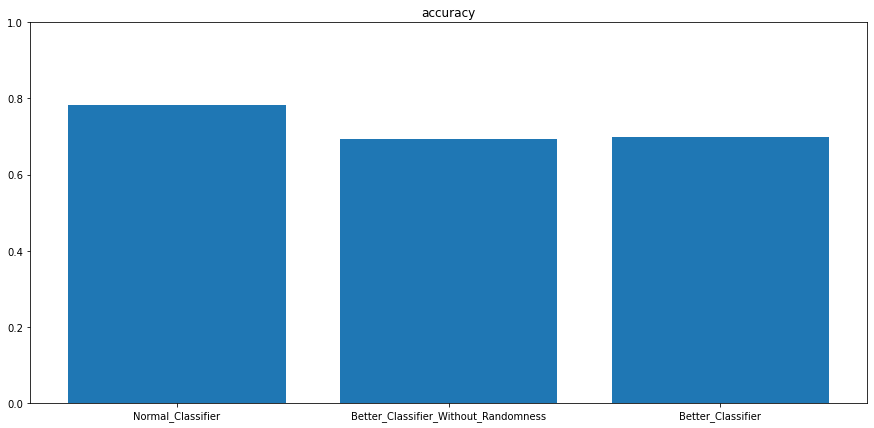

In [3]:
#10,000 Original samples
x=Results('Test_Results/Original_Images/01_Original.csv')
key='accuracy'
y = []
for i in x:
    y.append(i[key])
plt.figure(figsize=(15,7))
plt.bar(labels,y)
plt.ylim(0,1)
plt.title(key)

In [4]:
print(attacks)

['02_PGD_Untargeted_with_10_iterations.csv', '03_PGD_Untargeted_with_40_iterations.csv', '04_PGD_Targeted_with_10_iterations.csv', '05_PGD_Targeted_with_40_iterations.csv', '06_FGSM_Untargeted_with_0.3_eps.csv', '07_FGSM_Untargeted_with_1.0_eps.csv', '08_FGSM_Untargeted_with_5.0_eps.csv']


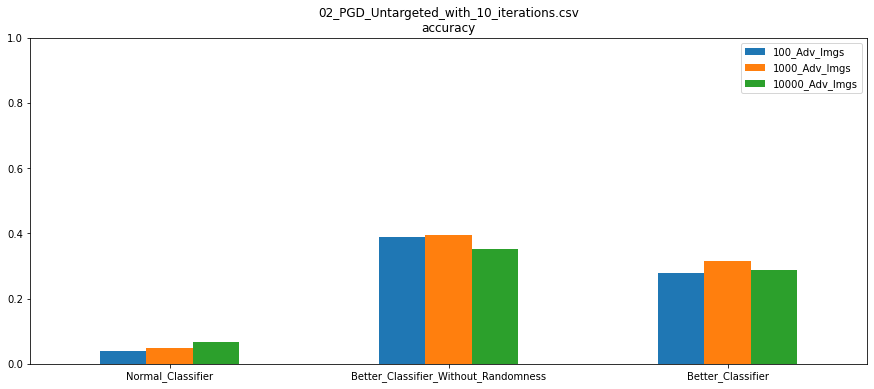

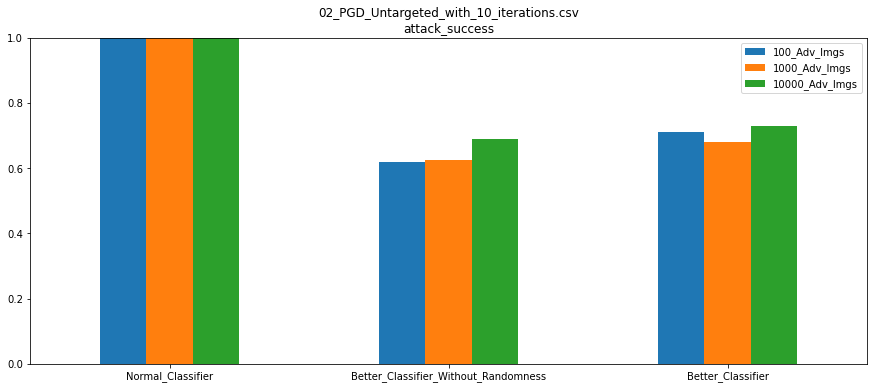

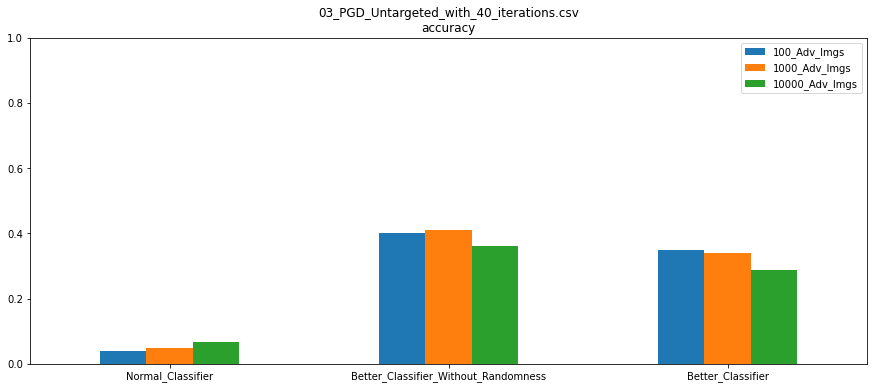

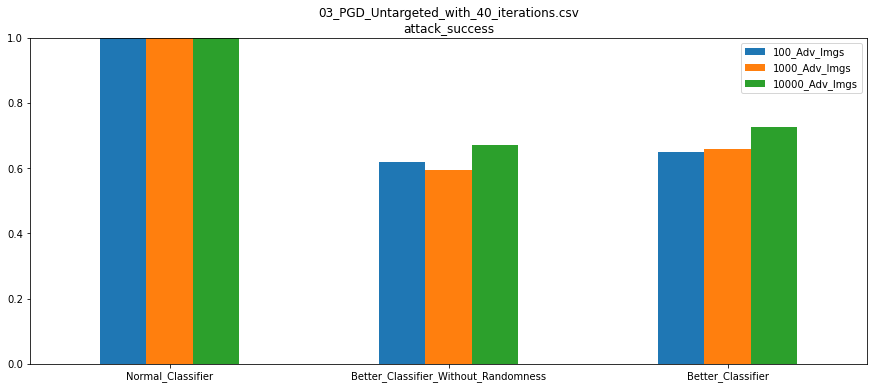

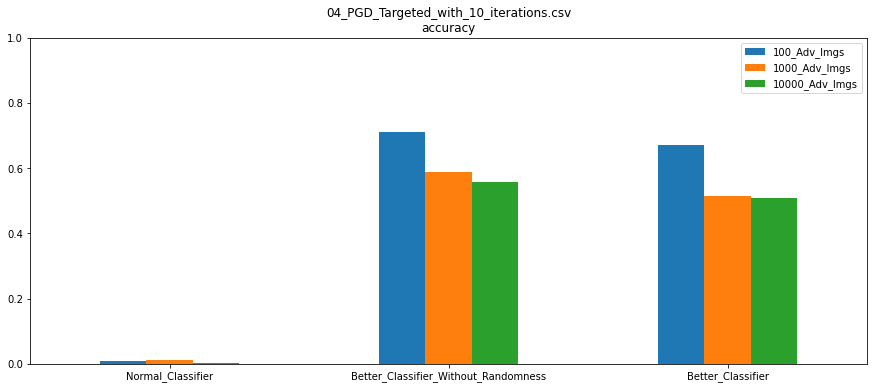

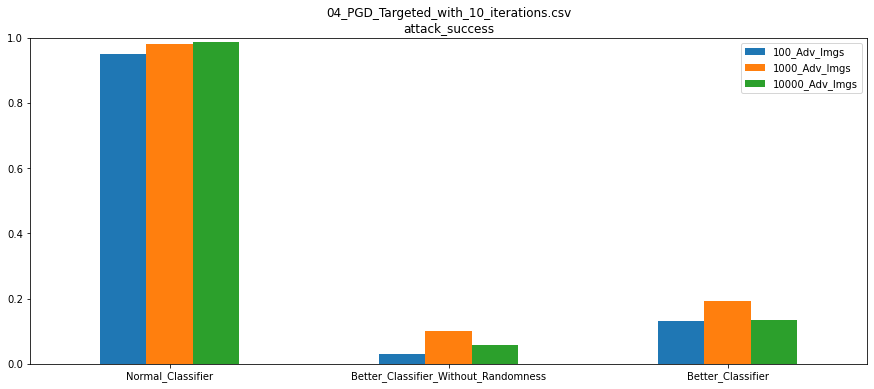

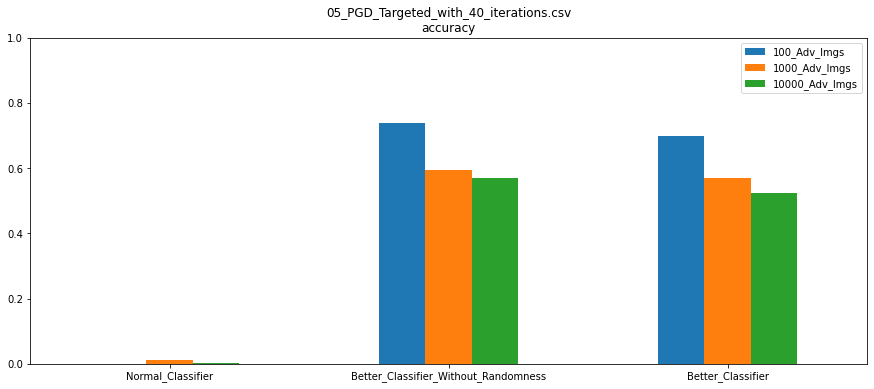

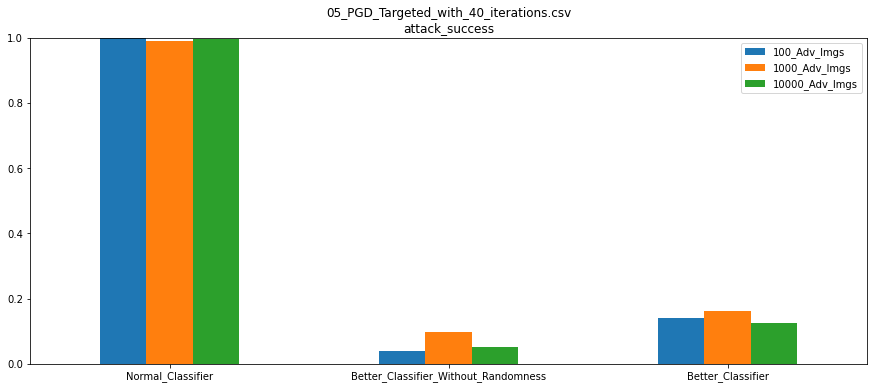

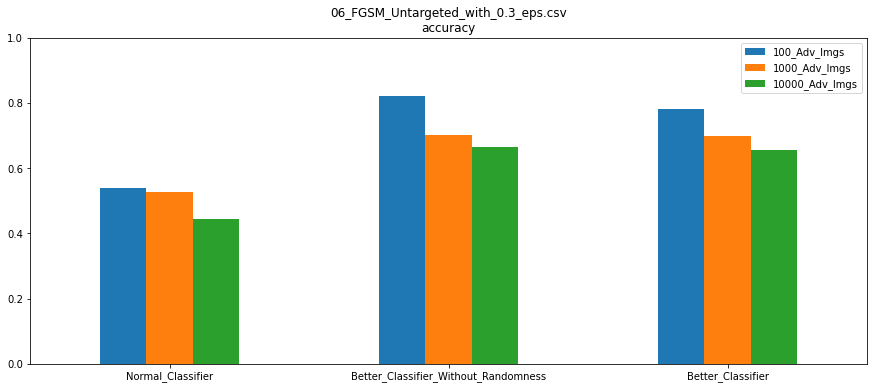

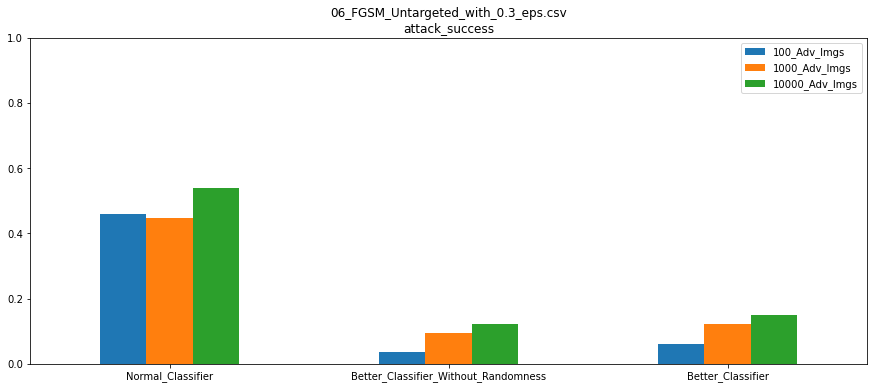

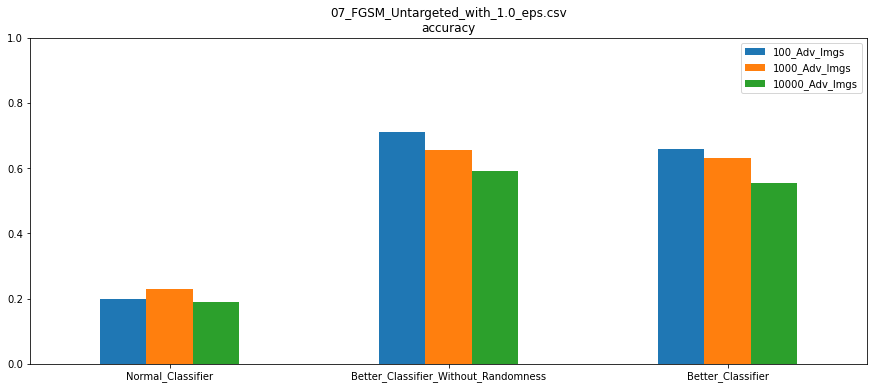

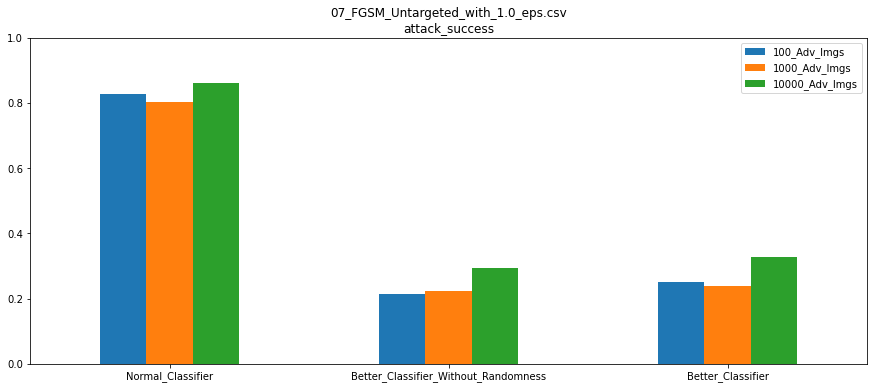

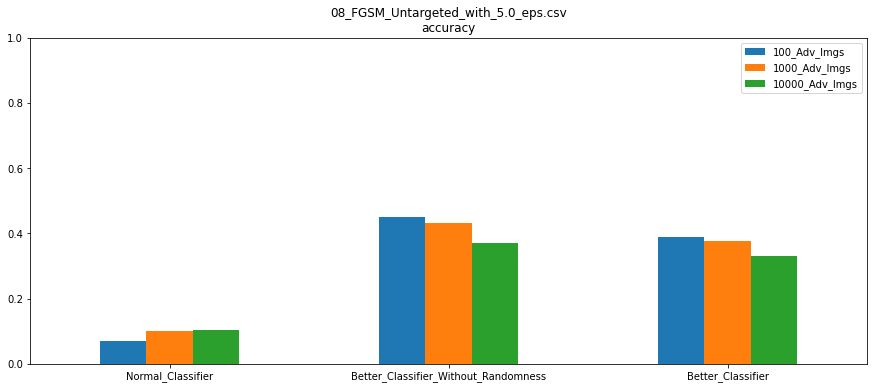

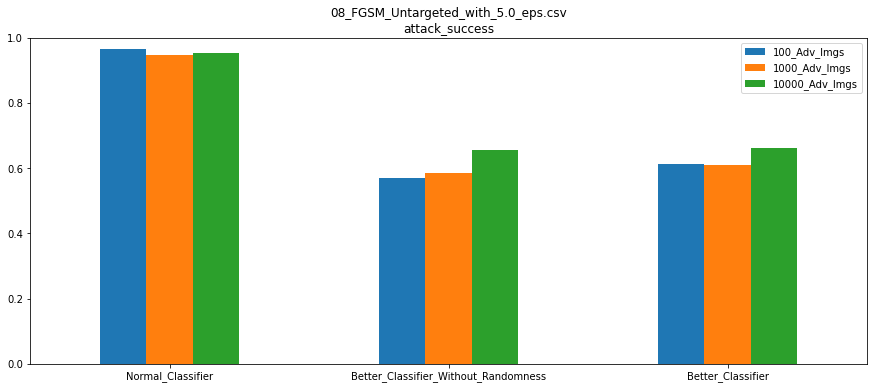

In [5]:
#insert the name of the attack or iterate from the list; enter the keys for the graph in a list. For example:
for attack in attacks:
    graph(attack,['accuracy','attack_success'])